In [2]:
import geopandas as gpd
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np
from tqdm import tqdm

* TODO: need to handle maxspeed:type=DE:urban
* TODO: need to handle maxspeed:type=DE:rural

# get network (2017 & 2024)

In [2]:
osm_roads_all = gpd.read_parquet("../processed_osm_files/germany_roads_2018_2024.parquet")
osm_roads_2024=osm_roads_all[osm_roads_all.year=="2024"].copy()
osm_roads_2024 = osm_roads_2024.to_crs(epsg=25832)

In [3]:
osm_roads_2024

highway maxspeed maxspeed:conditional maxspeed:type  \
0         tertiary     None                 None          None   
1        secondary      100                 None          None   
2        secondary       50                 None          None   
3         tertiary       50                 None          None   
4          primary       50                 None          None   
...            ...      ...                  ...           ...   
1156966   tertiary       50                 None          None   
1156967   tertiary       50                 None          None   
1156968   tertiary       50                 None          None   
1156969   tertiary       50                 None          None   
1156970   tertiary       50                 None          None   

        maxspeed:forward maxspeed:backward zone:traffic          id  \
0                   None              None     DE:urban          99   
1                   None              None     DE:rural         100   
2                   None              None         None         122   
3                   None              None     DE:urban         123   
4                   None              None         None        1978   
...                  ...               ...          ...         ...   
1156966             None              None         None  1236125759   
1156967             None              None         None  1236125760   
1156968             None              None         None  1236125761   
1156969             None              None         None  1236125762   
1156970             None              None         None  1236125763   

                                                  geometry  year  
0        MULTILINESTRING ((675921.957 5338360.049, 6759...  2024  
1        MULTILINESTRING ((673224.178 5338944.268, 6732...  2024  
2        LINESTRING (831653.548 5663833.164, 831668.759...  2024  
3        MULTILINESTRING ((832886.265 5664175.265, 8328...  2024  
4        MULTILINESTRING ((560704.892 5924993.209, 5607...  2024  
...                                                    ...   ...  
1156966  LINESTRING (492258.021 5755215.876, 492229.198...  2024  
1156967  LINESTRING (492297.051 5755150.053, 492300.092...  2024  
1156968  MULTILINESTRING ((492309.431 5755229.798, 4923...  2024  
1156969  MULTILINESTRING ((492298.815 5755189.084, 4922...  2024  
1156970  MULTILINESTRING ((492300.092 5755167.019, 4923...  2024  

[1156971 rows x 10 columns]

### get raster data

In [4]:
#raster.to_parquet(r"DE_Grid_ETRS89-UTM32_1km.gpkg\Zensus2022_grid_final_7053549391879339012.parquet")

# full raster (not only with )
#raster = gpd.read_parquet(r"..\..\ohsome\Gitteransatz\DE_Grid\Zensus2022_grid_final_7053549391879339012.parquet")

raster = gpd.read_file("../raster_data/Zensus2022_grid_final_7053549391879339012.gpkg")

In [5]:
raster=raster[["id","Einwohner","geometry"]].copy()

In [6]:
raster

id  Einwohner  \
0       1kmN2692E4341       21.0   
1       1kmN2692E4344       18.0   
2       1kmN2693E4340       29.0   
3       1kmN2694E4340       17.0   
4       1kmN2694E4343        9.0   
...               ...        ...   
384176  1kmN3555E4200        NaN   
384177  1kmN3555E4201        NaN   
384178  1kmN3556E4196        NaN   
384179  1kmN3556E4197        NaN   
384180  1kmN3556E4198        NaN   

                                                 geometry  
0       MULTIPOLYGON (((1142634.394 5997957.954, 11441...  
1       MULTIPOLYGON (((1147050.277 5997940.929, 11485...  
2       MULTIPOLYGON (((1141167.27 5999441.922, 114263...  
3       MULTIPOLYGON (((1141172.111 6000920.989, 11426...  
4       MULTIPOLYGON (((1145589.527 6000904.744, 11470...  
...                                                   ...  
384176  MULTIPOLYGON (((902321.335 7378578.267, 904063...  
384177  MULTIPOLYGON (((904063.338 7378623.975, 905805...  
384178  MULTIPOLYGON (((895305.159 7380138.895, 897047...  
384179  MULTIPOLYGON (((897047.472 7380186.141, 898789...  
384180  MULTIPOLYGON (((898789.804 7380233.008, 900532...  

[384181 rows x 3 columns]

In [7]:
osm_roads_2024["maxspeed:type"].value_counts(dropna=False)[:30]

maxspeed:type
None             1087669
DE:urban           32259
sign               24802
DE:rural           11127
DE:zone30            765
DE:zone20             44
DEːurban              39
DE:zone               25
de:urban              24
CH:urban              21
DE:sign               19
rural                 17
de:rural              16
NL:rural              12
sign;DE:rural         11
AT:urban              10
DEːrural               9
urban                  8
CH:rural               8
DE:zone50              8
DE:zone40              6
DE:urban;sign          6
AT:rural               6
FR:zone30              5
CZ:rural               5
PL:urban               5
DE:zone:30             5
de:national            5
DE:motorway            4
traffic_sign           4
Name: count, dtype: int64

In [8]:
osm_roads_2024[osm_roads_2024["maxspeed:type"]=="DE:urban"].maxspeed.value_counts(dropna=False)

maxspeed
50          19816
None        12243
30            133
100            34
70             14
60              8
40              8
10              1
80              1
DE:urban        1
Name: count, dtype: int64

In [9]:
osm_roads_2024[osm_roads_2024["maxspeed:type"]=="DE:rural"].maxspeed.value_counts(dropna=False)

maxspeed
None        5800
100         5070
50           125
70            89
80            25
30             8
60             7
DE:rural       1
40             1
110            1
Name: count, dtype: int64

In [10]:
osm_roads_2024.maxspeed.value_counts(dropna=False)[:30]

maxspeed
50                  533826
None                259300
100                 136661
70                  117950
30                   59354
60                   25119
80                   15716
40                    6105
20                    1300
90                     510
DE:urban               418
10                     212
DE:rural               143
none                   133
signals                 71
120                     61
5                       14
58                      13
15                       8
65                       6
60;80                    5
AT:rural                 4
130                      4
DE:living_street         4
110                      3
25                       3
variable                 3
70; 50                   2
walk                     2
7                        2
Name: count, dtype: int64

In [11]:
osm_roads_2024.highway.value_counts(dropna=False)[:30]

highway
secondary         464518
tertiary          428586
primary           225955
primary_link       18045
secondary_link     13031
tertiary_link       6836
Name: count, dtype: int64

In [12]:
osm_roads_2024['complete'] = osm_roads_2024['maxspeed'].fillna('None').apply(lambda x: 0 if x == 'None' else 1)
osm_roads_2024

highway maxspeed maxspeed:conditional maxspeed:type  \
0         tertiary     None                 None          None   
1        secondary      100                 None          None   
2        secondary       50                 None          None   
3         tertiary       50                 None          None   
4          primary       50                 None          None   
...            ...      ...                  ...           ...   
1156966   tertiary       50                 None          None   
1156967   tertiary       50                 None          None   
1156968   tertiary       50                 None          None   
1156969   tertiary       50                 None          None   
1156970   tertiary       50                 None          None   

        maxspeed:forward maxspeed:backward          id  \
0                   None              None          99   
1                   None              None         100   
2                   None              None         122   
3                   None              None         123   
4                   None              None        1978   
...                  ...               ...         ...   
1156966             None              None  1236125759   
1156967             None              None  1236125760   
1156968             None              None  1236125761   
1156969             None              None  1236125762   
1156970             None              None  1236125763   

                                                  geometry  year  complete  
0        MULTILINESTRING ((675921.957 5338360.049, 6759...  2024         0  
1        MULTILINESTRING ((673224.178 5338944.268, 6732...  2024         1  
2        LINESTRING (831653.548 5663833.164, 831668.759...  2024         1  
3        MULTILINESTRING ((832886.265 5664175.265, 8328...  2024         1  
4        MULTILINESTRING ((560704.892 5924993.209, 5607...  2024         1  
...                                                    ...   ...       ...  
1156966  LINESTRING (492258.021 5755215.876, 492229.198...  2024         1  
1156967  LINESTRING (492297.051 5755150.053, 492300.092...  2024         1  
1156968  MULTILINESTRING ((492309.431 5755229.798, 4923...  2024         1  
1156969  MULTILINESTRING ((492298.815 5755189.084, 4922...  2024         1  
1156970  MULTILINESTRING ((492300.092 5755167.019, 4923...  2024         1  

[1156971 rows x 10 columns]

In [13]:
# this takes a while ~2min

# Ensure both GeoDataFrames have the same CRS
#gdf_lines = osm_roads_all[::100].to_crs(25832).copy()
gdf_lines = osm_roads_2024.to_crs(25832).copy()
gdf_polygons = raster.to_crs(25832).copy()

agg_pivot=pd.DataFrame()

# Reset index to access the timestamp
gdf_lines = gdf_lines.reset_index()

# **🚀 Step 1: Pre-Filter Polygons that Contain at Least One Line**
gdf_polygons_filtered = gdf_polygons.sjoin(gdf_lines, how="inner", predicate="intersects").drop_duplicates(subset=['id_left'])[['id_left', 'geometry']]

# Define the years and speed categories to consider
speed_categories = [1, 0]

# **🚀 Step 2: Filter relevant lines once**
gdf_lines_filtered = gdf_lines[gdf_lines["complete"].isin(speed_categories)]

# **🚀 Step 3: Clip all lines to polygons at once**
gdf_clipped = gdf_lines_filtered.overlay(gdf_polygons_filtered, how="intersection")

# **🚀 Step 4: Compute Lengths Efficiently**
gdf_clipped["length"] = gdf_clipped.geometry.length

# **🚀 Step 5: Aggregate by Polygon, Year, and Speed**
agg_data = gdf_clipped.groupby(["id_left", "complete"])["length"].sum().reset_index()

# **🚀 Step 6: Pivot to create year/speed columns**
agg_pivot = agg_data.pivot(index="id_left", columns=["complete"], values="length").fillna(0)

# ✅ **Convert MultiIndex to Strings for Easier Column Handling**
#agg_pivot.columns = [f"{str(col[1])}" for col in agg_pivot.columns]

agg_pivot=agg_pivot.reset_index()
#
## **🚀 Step 7: Compute Total Length & Ratios**
agg_pivot["total_length"] = agg_pivot[1] + agg_pivot[0]
agg_pivot["ratio_complete"] = agg_pivot[1] / agg_pivot["total_length"]

## **🚀 Step 8: Merge Results Back**
#gdf_polygons_res = gdf_polygons_filtered.merge(agg_pivot, left_on="id_left", right_index=True, how="left").fillna(0)


In [14]:
agg_pivot

complete        id_left           0            1  total_length  ratio_complete
0         1kmN2693E4341    0.000000   677.248721    677.248721        1.000000
1         1kmN2694E4341    0.000000  1060.616513   1060.616513        1.000000
2         1kmN2695E4341    0.000000  1258.406465   1258.406465        1.000000
3         1kmN2696E4337    0.000000  1037.984624   1037.984624        1.000000
4         1kmN2696E4338    0.000000   424.195912    424.195912        1.000000
...                 ...         ...          ...           ...             ...
210082       1kmN3E4471    0.000000   300.514839    300.514839        1.000000
210083       1kmN3E4472  603.715361   610.354563   1214.069925        0.502734
210084       1kmN3E4475    0.000000  1125.425128   1125.425128        1.000000
210085       1kmN3E4479    0.000000  1063.570497   1063.570497        1.000000
210086       1kmN3E4480    0.000000   409.107018    409.107018        1.000000

[210087 rows x 5 columns]

In [15]:
gdf_polygons_res = gdf_polygons_filtered.merge(agg_pivot, on="id_left", how="left").fillna(0)


In [16]:
gdf_polygons_res

id_left                                           geometry  \
0       1kmN2696E4341  MULTIPOLYGON (((595465.662 5247866.582, 596464...   
1       1kmN2697E4342  MULTIPOLYGON (((596451.784 5248879.585, 597450...   
2       1kmN2698E4340  MULTIPOLYGON (((594441.168 5249854.626, 595440...   
3       1kmN2699E4339  MULTIPOLYGON (((593429.458 5250842.3, 594428.3...   
4       1kmN2699E4341  MULTIPOLYGON (((595427.286 5250867.634, 596426...   
...               ...                                                ...   
210082  1kmN3545E4218  MULTIPOLYGON (((461041.029 6094973.375, 462040...   
210083  1kmN3546E4221  MULTIPOLYGON (((464024.416 6096014.094, 465023...   
210084  1kmN3548E4218  MULTIPOLYGON (((460998.819 6097973.053, 461997...   
210085  1kmN3548E4219  MULTIPOLYGON (((461997.968 6097986.655, 462997...   
210086  1kmN3549E4218  MULTIPOLYGON (((460984.748 6098972.95, 461983....   

                 0            1  total_length  ratio_complete  
0         0.000000    43.692080     43.692080        1.000000  
1         0.000000   419.704592    419.704592        1.000000  
2         0.000000  1043.827208   1043.827208        1.000000  
3       222.480646     0.000000    222.480646        0.000000  
4         0.000000  1202.935233   1202.935233        1.000000  
...            ...          ...           ...             ...  
210082    0.000000  1009.900427   1009.900427        1.000000  
210083   53.667925   173.477759    227.145684        0.763729  
210084    0.000000   742.886281    742.886281        1.000000  
210085    0.000000  1255.007427   1255.007427        1.000000  
210086    0.000000   246.870356    246.870356        1.000000  

[210087 rows x 6 columns]

<Axes: >

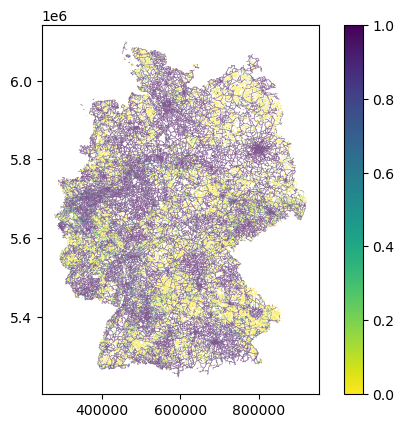

In [16]:
gdf_polygons_res.plot(column="ratio_complete", legend=True, cmap="viridis_r")

C:\Users\simon\AppData\Local\Temp\ipykernel_20844\2959007343.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


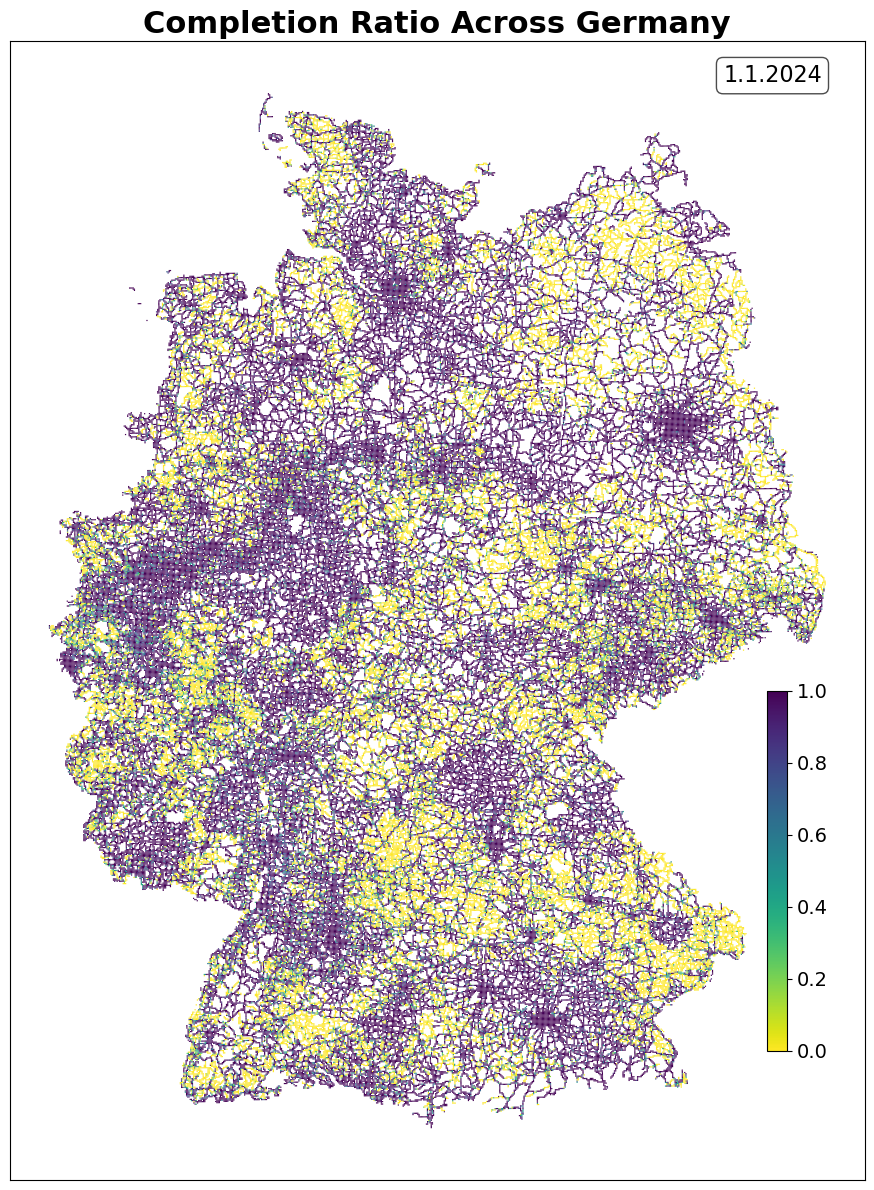

In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 12))

# Plot without legend
gdf_polygons_res.plot(
    column="ratio_complete",
    cmap="viridis_r",
    ax=ax,
)

# Remove axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")

# Add a title
ax.set_title("Completion Ratio Across Germany", fontsize=22, fontweight='bold')

# Add date in the top right corner
ax.text(
    0.95, 0.98, "1.1.2024",
    transform=ax.transAxes,
    fontsize=16,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3')
)

# Create a ScalarMappable for the colorbar
norm = mpl.colors.Normalize(vmin=gdf_polygons_res["ratio_complete"].min(),
                            vmax=gdf_polygons_res["ratio_complete"].max())
sm = mpl.cm.ScalarMappable(cmap="viridis_r", norm=norm)
sm._A = []  # Required for colorbar

# Add the vertical colorbar manually inside the plot (bottom right)
# [left, bottom, width, height] - adjust to fit well in the corner
cbar_ax = fig.add_axes([0.83, 0.12, 0.02, 0.3])
cbar = plt.colorbar(sm, cax=cbar_ax, orientation="vertical")
cbar.ax.tick_params(labelsize=14)

# Show the plot
plt.tight_layout()
plt.show()


### Filter to Raster with >100 People

In [19]:
gdf_polygons_res_ew=gdf_polygons_res.merge(raster[["id","Einwohner"]], left_on="id_left",right_on="id", how="left")
gdf_polygons_res_ew_100=gdf_polygons_res_ew[gdf_polygons_res_ew.Einwohner>100]
gdf_polygons_res_ew_100

id_left                                           geometry  \
3       1kmN2699E4339  MULTIPOLYGON (((593429.458 5250842.3, 594428.3...   
4       1kmN2699E4341  MULTIPOLYGON (((595427.286 5250867.634, 596426...   
5       1kmN2700E4339  MULTIPOLYGON (((593416.656 5251842.64, 594415....   
6       1kmN2700E4341  MULTIPOLYGON (((595414.49 5251867.978, 596413....   
13      1kmN2702E4342  MULTIPOLYGON (((596387.818 5253881.318, 597386...   
...               ...                                                ...   
209936  1kmN3518E4285  MULTIPOLYGON (((528365.667 6068902.814, 529364...   
209938  1kmN3519E4279  MULTIPOLYGON (((522356.476 6069818.634, 523355...   
209940  1kmN3522E4294  MULTIPOLYGON (((537301.419 6073028.719, 538300...   
209945  1kmN3524E4281  MULTIPOLYGON (((524283.926 6074845.886, 525283...   
209955  1kmN3529E4251  MULTIPOLYGON (((494238.583 6079427.87, 495237....   

                  0            1  total_length  ratio_complete             id  \
3        222.480646     0.000000    222.480646        0.000000  1kmN2699E4339   
4          0.000000  1202.935233   1202.935233        1.000000  1kmN2699E4341   
5          0.000000  1767.417225   1767.417225        1.000000  1kmN2700E4339   
6          0.000000  2103.805386   2103.805386        1.000000  1kmN2700E4341   
13         0.000000  1132.607832   1132.607832        1.000000  1kmN2702E4342   
...             ...          ...           ...             ...            ...   
209936    73.819097  1540.347291   1614.166389        0.954268  1kmN3518E4285   
209938  1010.450242     0.000000   1010.450242        0.000000  1kmN3519E4279   
209940    62.638645  1233.984593   1296.623238        0.951691  1kmN3522E4294   
209945   421.110713     0.000000    421.110713        0.000000  1kmN3524E4281   
209955   359.133925   997.810843   1356.944768        0.735336  1kmN3529E4251   

        Einwohner  
3           125.0  
4          1906.0  
5           321.0  
6           666.0  
13          128.0  
...           ...  
209936      374.0  
209938      137.0  
209940      118.0  
209945      142.0  
209955      155.0  

[78748 rows x 8 columns]

<Axes: >

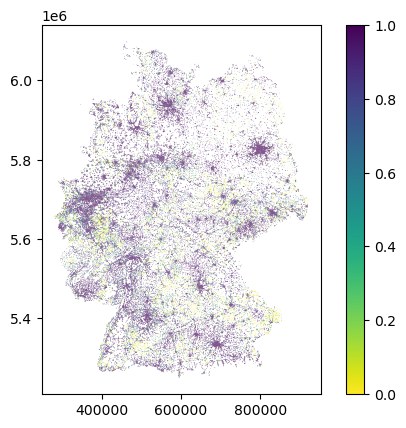

In [ ]:
gdf_polygons_res_ew_100.plot(column="ratio_complete", legend=True, cmap="viridis_r")

C:\Users\simon\AppData\Local\Temp\ipykernel_6948\3211557871.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


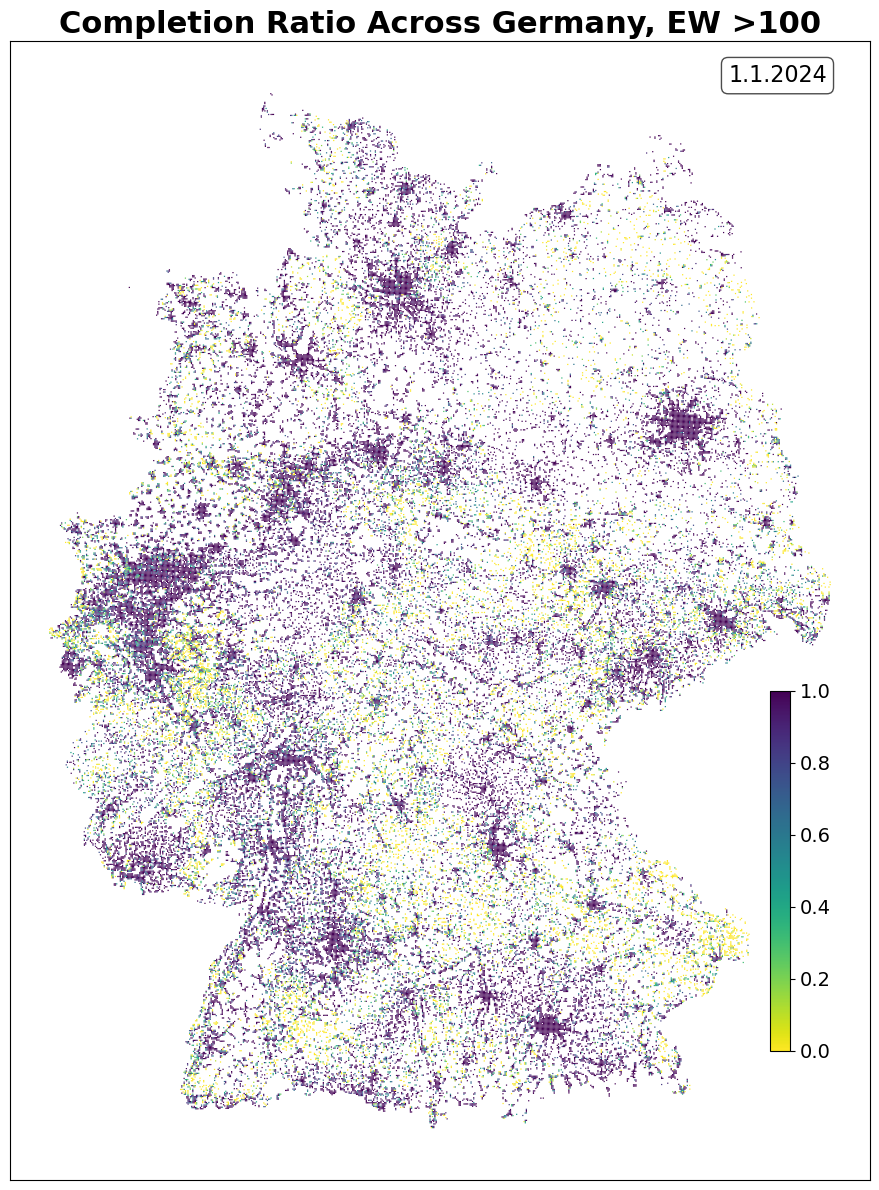

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 12))

# Plot without legend
gdf_polygons_res_ew_100.plot(
    column="ratio_complete",
    cmap="viridis_r",
    ax=ax,
)

# Remove axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")

# Add a title
ax.set_title("Completion Ratio Across Germany, EW >100", fontsize=22, fontweight='bold')

# Add date in the top right corner
ax.text(
    0.95, 0.98, "1.1.2024",
    transform=ax.transAxes,
    fontsize=16,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3')
)

# Create a ScalarMappable for the colorbar
norm = mpl.colors.Normalize(vmin=gdf_polygons_res["ratio_complete"].min(),
                            vmax=gdf_polygons_res["ratio_complete"].max())
sm = mpl.cm.ScalarMappable(cmap="viridis_r", norm=norm)
sm._A = []  # Required for colorbar

# Add the vertical colorbar manually inside the plot (bottom right)
# [left, bottom, width, height] - adjust to fit well in the corner
cbar_ax = fig.add_axes([0.83, 0.12, 0.02, 0.3])
cbar = plt.colorbar(sm, cax=cbar_ax, orientation="vertical")
cbar.ax.tick_params(labelsize=14)

# Show the plot
plt.tight_layout()
plt.show()


In [20]:
# Load Berlin boundary (very high detail)
bland = gpd.read_file("https://raw.githubusercontent.com/isellsoap/deutschlandGeoJSON/main/2_bundeslaender/1_sehr_hoch.geo.json")
bland_bb = bland[bland["id"] == "DE-BB"].copy()

C:\Users\simon\AppData\Local\Temp\ipykernel_20844\2703010266.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


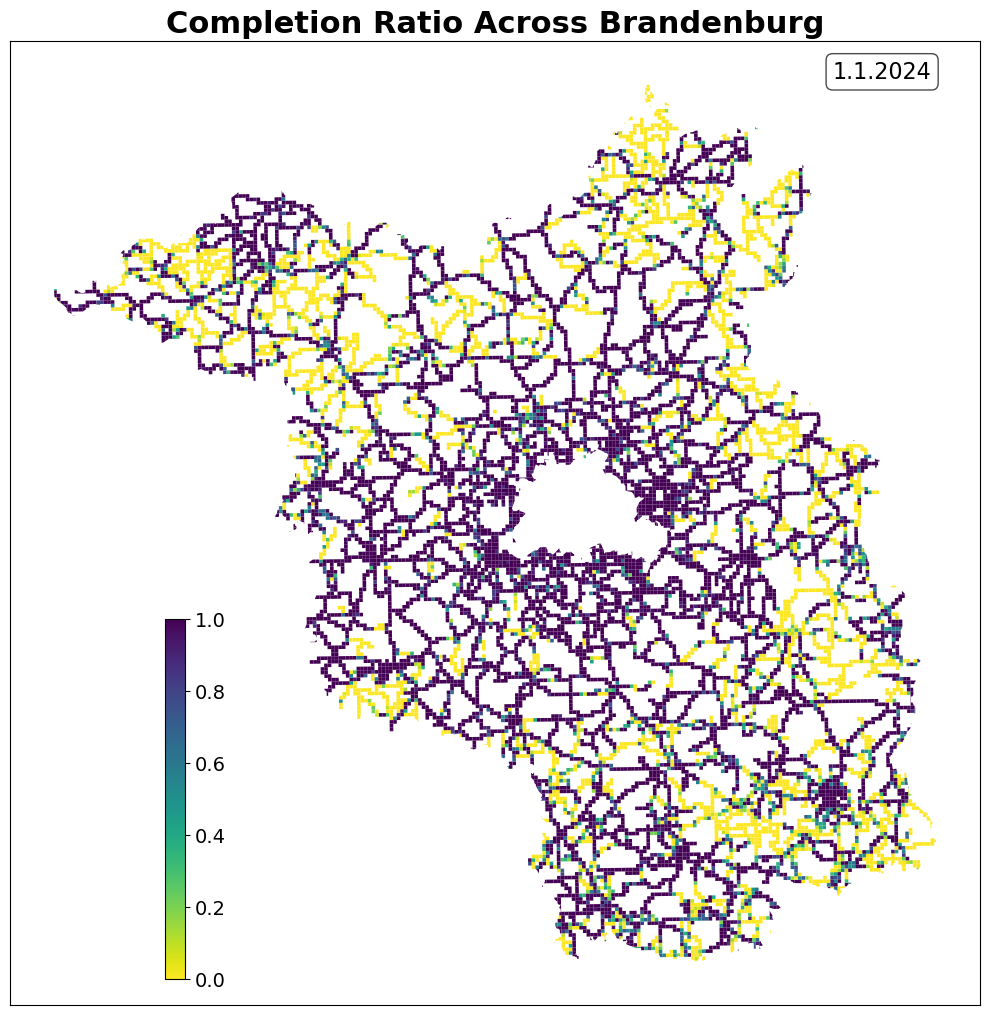

In [23]:



import matplotlib.pyplot as plt
import matplotlib as mpl

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 12))

# Plot without legend
gdf_polygons_res_ew.clip(bland_bb.to_crs(25832)).plot(
    column="ratio_complete",
    cmap="viridis_r",
    ax=ax,
)

# Remove axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")

# Add a title
ax.set_title("Completion Ratio Across Brandenburg", fontsize=22, fontweight='bold')

# Add date in the top right corner
ax.text(
    0.95, 0.98, "1.1.2024",
    transform=ax.transAxes,
    fontsize=16,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3')
)

# Create a ScalarMappable for the colorbar
norm = mpl.colors.Normalize(vmin=gdf_polygons_res["ratio_complete"].min(),
                            vmax=gdf_polygons_res["ratio_complete"].max())
sm = mpl.cm.ScalarMappable(cmap="viridis_r", norm=norm)
sm._A = []  # Required for colorbar

# Add the vertical colorbar manually inside the plot (bottom right)
# [left, bottom, width, height] - adjust to fit well in the corner
cbar_ax = fig.add_axes([0.17, 0.12, 0.02, 0.3])
cbar = plt.colorbar(sm, cax=cbar_ax, orientation="vertical")
cbar.ax.tick_params(labelsize=14)

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\simon\AppData\Local\Temp\ipykernel_20844\3814693893.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


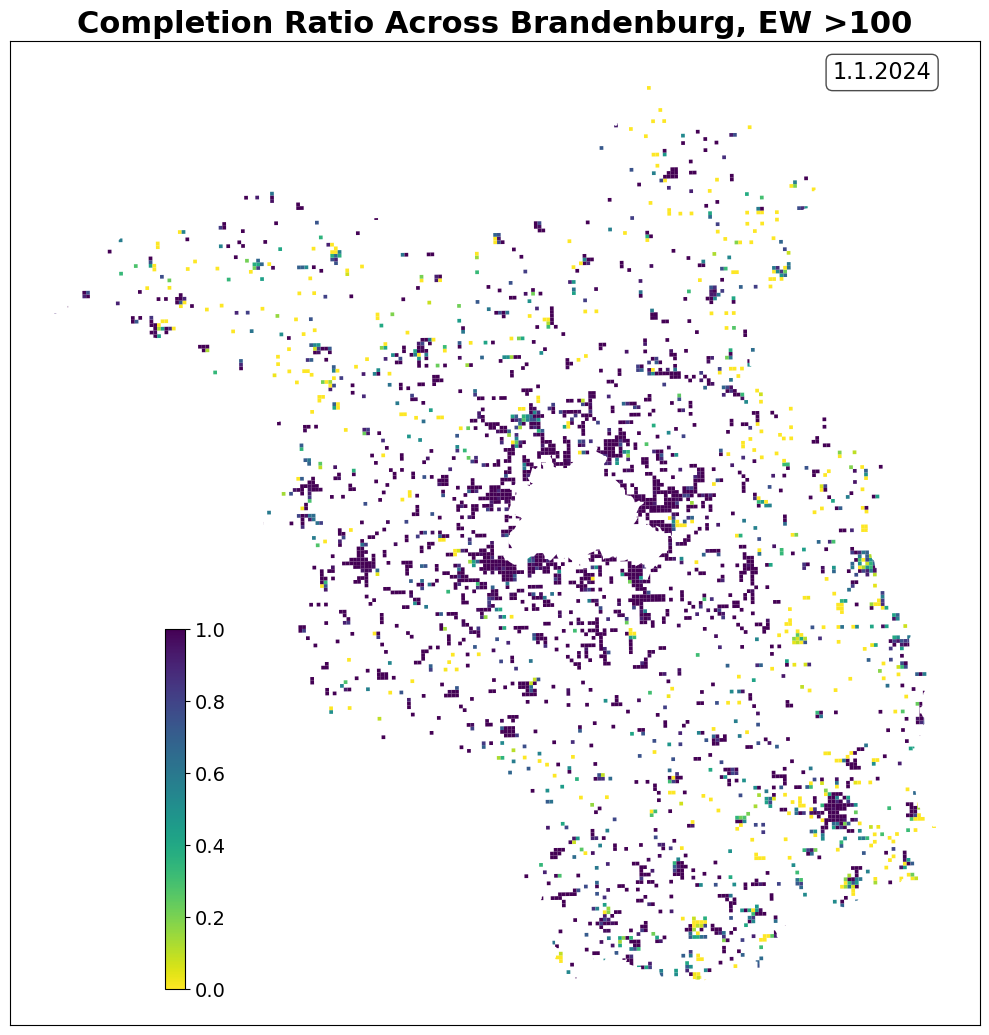

In [22]:



import matplotlib.pyplot as plt
import matplotlib as mpl

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 12))

# Plot without legend
gdf_polygons_res_ew_100.clip(bland_bb.to_crs(25832)).plot(
    column="ratio_complete",
    cmap="viridis_r",
    ax=ax,
)

# Remove axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")

# Add a title
ax.set_title("Completion Ratio Across Brandenburg, EW >100", fontsize=22, fontweight='bold')

# Add date in the top right corner
ax.text(
    0.95, 0.98, "1.1.2024",
    transform=ax.transAxes,
    fontsize=16,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3')
)

# Create a ScalarMappable for the colorbar
norm = mpl.colors.Normalize(vmin=gdf_polygons_res["ratio_complete"].min(),
                            vmax=gdf_polygons_res["ratio_complete"].max())
sm = mpl.cm.ScalarMappable(cmap="viridis_r", norm=norm)
sm._A = []  # Required for colorbar

# Add the vertical colorbar manually inside the plot (bottom right)
# [left, bottom, width, height] - adjust to fit well in the corner
cbar_ax = fig.add_axes([0.17, 0.12, 0.02, 0.3])
cbar = plt.colorbar(sm, cax=cbar_ax, orientation="vertical")
cbar.ax.tick_params(labelsize=14)

# Show the plot
plt.tight_layout()
plt.show()


In [24]:
gdf_polygons_res_ew_bb=gdf_polygons_res_ew.clip(bland_bb.to_crs(25832)).copy()

#### add accidents to check where we got many accidents and no/little speed limit information

In [27]:



accidents = gpd.read_file(r"../accident_data/accidents_germany_2017-2023_si.gpkg", mask=gdf_polygons_res_ew_bb.buffer(10).to_crs(4326).union_all())

<Axes: >

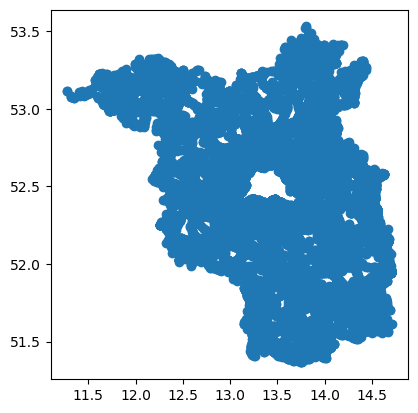

In [29]:
accidents.plot()

In [30]:
gdf_polygons=gdf_polygons_res_ew_bb.copy()

# Ensure CRS is the same for both GeoDataFrames
gdf_points = accidents.to_crs(gdf_polygons.crs)

# Perform spatial join (each point is assigned to a polygon)
joined = gpd.sjoin(gdf_points, gdf_polygons, predicate="within")

# Count points per polygon per year
point_counts = joined.groupby(["index_right", "UJAHR"]).size().reset_index(name="count")

# Pivot the data to create separate columns for each year
point_counts_pivot = point_counts.pivot(index="index_right", columns="UJAHR", values="count").fillna(0)

# Rename columns to match the format: "2018_count"
point_counts_pivot.columns = [f"{int(year)}_count" for year in point_counts_pivot.columns]

# Merge the count data back into the polygons GeoDataFrame
gdf_polygons_merge = gdf_polygons.merge(point_counts_pivot, left_index=True, right_index=True, how="left")

# Fill NaN values with 0 (for polygons that have no points)
gdf_polygons_merge = gdf_polygons_merge.fillna(0)

gdf_polygons_merge.sort_values("2023_count",ascending=False).head()

id_left                                           geometry  \
160609  1kmN3258E4528  POLYGON ((774960.506 5813384.557, 775961.053 5...   
160786  1kmN3259E4529  POLYGON ((775947.1 5814399.028, 776947.655 581...   
160610  1kmN3258E4529  POLYGON ((775961.053 5813398.707, 776961.609 5...   
140186  1kmN3192E4619  POLYGON ((866964.155 5748620.565, 867965.593 5...   
160592  1kmN3258E4494  POLYGON ((740946.448 5812904.403, 741946.741 5...   

                0            1  total_length  ratio_complete             id  \
160609   0.000000  3729.242554   3729.242554        1.000000  1kmN3258E4528   
160786   5.390061  3497.900607   3503.290667        0.998461  1kmN3259E4529   
160610  24.461063  4280.408258   4304.869321        0.994318  1kmN3258E4529   
140186   0.000000  2960.625576   2960.625576        1.000000  1kmN3192E4619   
160592   0.000000  1985.421308   1985.421308        1.000000  1kmN3258E4494   

        Einwohner  2017_count  2018_count  2019_count  2020_count  2021_count  \
160609     6708.0        49.0        47.0        54.0        48.0        48.0   
160786     4894.0        49.0        73.0        67.0        56.0        49.0   
160610     4217.0        57.0        53.0        40.0        36.0        38.0   
140186     7370.0        28.0        15.0        24.0        13.0        21.0   
160592     4182.0        25.0        20.0        21.0        19.0        29.0   

        2022_count  2023_count  
160609        57.0        55.0  
160786        50.0        53.0  
160610        43.0        42.0  
140186        27.0        37.0  
160592        30.0        31.0

<Axes: >

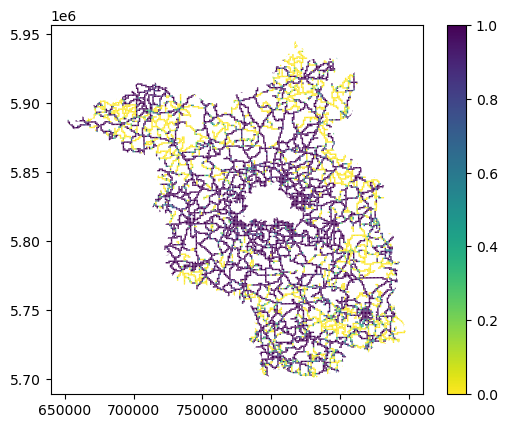

In [33]:
gdf_polygons_merge.plot(column="ratio_complete", legend=True, cmap="viridis_r")

In [37]:
gdf_polygons_merge["total_count"] = gdf_polygons_merge[
    ["2017_count", "2018_count", "2019_count", "2020_count", "2021_count", "2022_count", "2023_count"]
].sum(axis=1)
gdf_polygons_merge.sort_values("total_count",ascending=False)[:10]

id_left                                           geometry  \
160786  1kmN3259E4529  POLYGON ((775947.1 5814399.028, 776947.655 581...   
160609  1kmN3258E4528  POLYGON ((774960.506 5813384.557, 775961.053 5...   
160610  1kmN3258E4529  POLYGON ((775961.053 5813398.707, 776961.609 5...   
160785  1kmN3259E4528  POLYGON ((774946.553 5814384.872, 775947.1 581...   
170185  1kmN3291E4563  POLYGON ((809521.774 5846898.116, 810522.596 5...   
175435  1kmN3316E4509  POLYGON ((755138.354 5871129.234, 756138.708 5...   
160592  1kmN3258E4494  POLYGON ((740946.448 5812904.403, 741946.741 5...   
139838  1kmN3190E4619  POLYGON ((866991.708 5746618.796, 867993.147 5...   
140186  1kmN3192E4619  POLYGON ((866964.155 5748620.565, 867965.593 5...   
160427  1kmN3257E4529  POLYGON ((775975.004 5812398.386, 776975.56 58...   

                 0            1  total_length  ratio_complete             id  \
160786    5.390061  3497.900607   3503.290667        0.998461  1kmN3259E4529   
160609    0.000000  3729.242554   3729.242554        1.000000  1kmN3258E4528   
160610   24.461063  4280.408258   4304.869321        0.994318  1kmN3258E4529   
160785    0.000000  3395.688293   3395.688293        1.000000  1kmN3259E4528   
170185  380.456426  2590.414824   2970.871250        0.871938  1kmN3291E4563   
175435    0.000000  1065.967507   1065.967507        1.000000  1kmN3316E4509   
160592    0.000000  1985.421308   1985.421308        1.000000  1kmN3258E4494   
139838    0.000000  6703.116655   6703.116655        1.000000  1kmN3190E4619   
140186    0.000000  2960.625576   2960.625576        1.000000  1kmN3192E4619   
160427  254.027532  3717.678972   3971.706504        0.936041  1kmN3257E4529   

        Einwohner  2017_count  2018_count  2019_count  2020_count  2021_count  \
160786     4894.0        49.0        73.0        67.0        56.0        49.0   
160609     6708.0        49.0        47.0        54.0        48.0        48.0   
160610     4217.0        57.0        53.0        40.0        36.0        38.0   
160785     5169.0        33.0        21.0        30.0        24.0        21.0   
170185     5638.0        34.0        26.0        30.0        28.0        23.0   
175435     5562.0        19.0        32.0        23.0        28.0        26.0   
160592     4182.0        25.0        20.0        21.0        19.0        29.0   
139838     4999.0        18.0        23.0        26.0        27.0        27.0   
140186     7370.0        28.0        15.0        24.0        13.0        21.0   
160427     2615.0        18.0        20.0        27.0        26.0        17.0   

        2022_count  2023_count  total_count  
160786        50.0        53.0        397.0  
160609        57.0        55.0        358.0  
160610        43.0        42.0        309.0  
160785        25.0        30.0        184.0  
170185        19.0        23.0        183.0  
175435        26.0        29.0        183.0  
160592        30.0        31.0        175.0  
139838        26.0        20.0        167.0  
140186        27.0        37.0        165.0  
160427        26.0        25.0        159.0

In [54]:
top10 = gdf_polygons_merge.sort_values("total_count", ascending=False).copy()
top10_low_r = top10[top10["ratio_complete"]<0.9].head(100).copy()

top10_low_r.to_crs(4326)[["id_left","ratio_complete","total_count","geometry"]].explore(column="ratio_complete", cmap="viridis_r", legend=True)

In [49]:
print(top10.dtypes)

id_left             object
geometry          geometry
0                  float64
1                  float64
total_length       float64
ratio_complete     float64
id                  object
Einwohner          float64
2017_count         float64
2018_count         float64
2019_count         float64
2020_count         float64
2021_count         float64
2022_count         float64
2023_count         float64
total_count        float64
dtype: object


<Axes: >

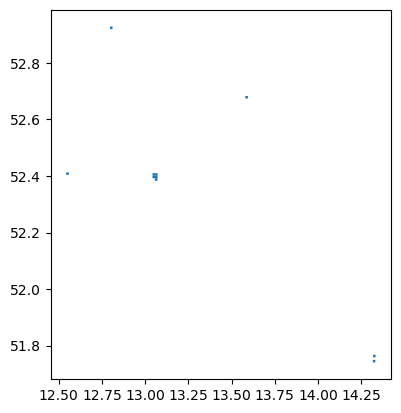

In [48]:
top10.to_crs(4326).plot()

### identify roads with missing maxspeed but likly many accidents to help effetivly map them

In [2]:
osm_roads_all = gpd.read_parquet("../processed_osm_files/germany_roads_2018_2024.parquet")
osm_roads_2024=osm_roads_all[osm_roads_all.year=="2024"].copy()
osm_roads_2024 = osm_roads_2024.to_crs(epsg=25832)
osm_roads_2024

highway maxspeed maxspeed:conditional maxspeed:type  \
0         tertiary     None                 None          None   
1        secondary      100                 None          None   
2        secondary       50                 None          None   
3         tertiary       50                 None          None   
4          primary       50                 None          None   
...            ...      ...                  ...           ...   
1156966   tertiary       50                 None          None   
1156967   tertiary       50                 None          None   
1156968   tertiary       50                 None          None   
1156969   tertiary       50                 None          None   
1156970   tertiary       50                 None          None   

        maxspeed:forward maxspeed:backward zone:traffic          id  \
0                   None              None     DE:urban          99   
1                   None              None     DE:rural         100   
2                   None              None         None         122   
3                   None              None     DE:urban         123   
4                   None              None         None        1978   
...                  ...               ...          ...         ...   
1156966             None              None         None  1236125759   
1156967             None              None         None  1236125760   
1156968             None              None         None  1236125761   
1156969             None              None         None  1236125762   
1156970             None              None         None  1236125763   

                                                  geometry  year  
0        MULTILINESTRING ((675921.957 5338360.049, 6759...  2024  
1        MULTILINESTRING ((673224.178 5338944.268, 6732...  2024  
2        LINESTRING (831653.548 5663833.164, 831668.759...  2024  
3        MULTILINESTRING ((832886.265 5664175.265, 8328...  2024  
4        MULTILINESTRING ((560704.892 5924993.209, 5607...  2024  
...                                                    ...   ...  
1156966  LINESTRING (492258.021 5755215.876, 492229.198...  2024  
1156967  LINESTRING (492297.051 5755150.053, 492300.092...  2024  
1156968  MULTILINESTRING ((492309.431 5755229.798, 4923...  2024  
1156969  MULTILINESTRING ((492298.815 5755189.084, 4922...  2024  
1156970  MULTILINESTRING ((492300.092 5755167.019, 4923...  2024  

[1156971 rows x 10 columns]

In [3]:
osm_roads_2024_not_missing_ms = osm_roads_2024[
    (osm_roads_2024.maxspeed.notnull()) |
    (osm_roads_2024["zone:traffic"].notnull()) |
    (osm_roads_2024["maxspeed:type"].notnull()) |
    (osm_roads_2024["maxspeed:forward"].notnull()) |
    (osm_roads_2024["maxspeed:backward"].notnull())
].copy()

In [4]:
osm_roads_2024_missing_ms = osm_roads_2024.merge(
    osm_roads_2024_not_missing_ms,
    how="left",
    indicator=True
).query('_merge == "left_only"').drop(columns=['_merge'])

In [5]:
osm_roads_2024_missing_ms

highway maxspeed maxspeed:conditional maxspeed:type  \
99        tertiary     None                 None          None   
122        primary     None                 None          None   
175       tertiary     None                 None          None   
240       tertiary     None                 None          None   
266      secondary     None                 None          None   
...            ...      ...                  ...           ...   
1156910   tertiary     None                 None          None   
1156937   tertiary     None                 None          None   
1156938   tertiary     None                 None          None   
1156952   tertiary     None                 None          None   
1156954   tertiary     None                 None          None   

        maxspeed:forward maxspeed:backward zone:traffic          id  \
99                  None              None         None     2575805   
122                 None              None         None     2725783   
175                 None              None         None     3101545   
240                 None              None         None     3214003   
266                 None              None         None     3236188   
...                  ...               ...          ...         ...   
1156910             None              None         None  1236103968   
1156937             None              None         None  1236104001   
1156938             None              None         None  1236104002   
1156952             None              None         None  1236113122   
1156954             None              None         None  1236113124   

                                                  geometry  year  
99       MULTILINESTRING ((480722.933 5505801.285, 4806...  2024  
122      LINESTRING (701967.164 5306128.162, 701959.294...  2024  
175      MULTILINESTRING ((827939.875 5661781.968, 8279...  2024  
240      MULTILINESTRING ((828609.055 5669710.787, 8285...  2024  
266      MULTILINESTRING ((472726.411 5497477.934, 4727...  2024  
...                                                    ...   ...  
1156910  MULTILINESTRING ((684033.237 5737744.752, 6840...  2024  
1156937  MULTILINESTRING ((683993.205 5733832.441, 6839...  2024  
1156938  LINESTRING (683984.109 5733828.711, 683993.205...  2024  
1156952  MULTILINESTRING ((584860.968 5600218.467, 5848...  2024  
1156954  MULTILINESTRING ((587710.131 5602072.651, 5877...  2024  

[197594 rows x 10 columns]

In [6]:
osm_roads_2024_missing_ms_25832 = osm_roads_2024_missing_ms.to_crs(25832).copy()


In [7]:
## this takes some 90seconds
osm_roads_2024_missing_ms_25832_buffered = osm_roads_2024_missing_ms_25832.copy()
osm_roads_2024_missing_ms_25832_buffered['geometry'] = osm_roads_2024_missing_ms_25832_buffered.geometry.buffer(10)
osm_roads_2024_missing_ms_25832_buffered

highway maxspeed maxspeed:conditional maxspeed:type  \
99        tertiary     None                 None          None   
122        primary     None                 None          None   
175       tertiary     None                 None          None   
240       tertiary     None                 None          None   
266      secondary     None                 None          None   
...            ...      ...                  ...           ...   
1156910   tertiary     None                 None          None   
1156937   tertiary     None                 None          None   
1156938   tertiary     None                 None          None   
1156952   tertiary     None                 None          None   
1156954   tertiary     None                 None          None   

        maxspeed:forward maxspeed:backward zone:traffic          id  \
99                  None              None         None     2575805   
122                 None              None         None     2725783   
175                 None              None         None     3101545   
240                 None              None         None     3214003   
266                 None              None         None     3236188   
...                  ...               ...          ...         ...   
1156910             None              None         None  1236103968   
1156937             None              None         None  1236104001   
1156938             None              None         None  1236104002   
1156952             None              None         None  1236113122   
1156954             None              None         None  1236113124   

                                                  geometry  year  
99       POLYGON ((480419.711 5506007.028, 480419.702 5...  2024  
122      POLYGON ((701967.599 5306110.857, 701967.013 5...  2024  
175      POLYGON ((827952.889 5661809.055, 827953.172 5...  2024  
240      POLYGON ((828559.81 5669685.929, 828558.854 56...  2024  
266      POLYGON ((472706.968 5497471.34, 472707.017 54...  2024  
...                                                    ...   ...  
1156910  POLYGON ((684014.492 5737753.128, 684013.574 5...  2024  
1156937  POLYGON ((683994.091 5733843.759, 684000.621 5...  2024  
1156938  POLYGON ((683989.411 5733841.693, 683990.336 5...  2024  
1156952  POLYGON ((584854.303 5600233.213, 584854.313 5...  2024  
1156954  POLYGON ((587703.02 5602080.289, 587703.096 56...  2024  

[197594 rows x 10 columns]

In [8]:
#accidents_buffer = gpd.read_file(r"../accident_data/accidents_germany_2017-2023_si.gpkg", mask=osm_roads_2024_missing_ms_25832_buffered.union_all().to_crs(4326))
#accidents_buffer_25832 = accidents_buffer.to_crs(25832).copy()

### read accidents

In [8]:
accidents = gpd.read_parquet(r"../accident_data/accidents_germany_2017-2023_si.parquet")
accidents_25832 = accidents.to_crs(25832).copy()

In [9]:
# Ensure both datasets have spatial indexes
accidents_25832.sindex
osm_roads_2024_missing_ms_25832_buffered.sindex

# Faster alternative using a spatial join (used to clip here)
accidents_clipped = gpd.sjoin(
    accidents_25832, osm_roads_2024_missing_ms_25832_buffered, how="inner", predicate="intersects"
).drop(columns=["index_right","year"])  # Remove unnecessary index column (year is from network)

accidents_clipped

OBJECTID  ULAND  UREGBEZ  UKREIS  UGEMEINDE  UJAHR  UMONAT  USTUNDE  \
16           17.0      1        0      60         94   2017       1        7   
21           22.0      1        0      58         49   2017       1        8   
35           36.0      1        0      51         82   2017       1       15   
42           43.0      1        0       1          0   2017       1       10   
42           43.0      1        0       1          0   2017       1       10   
...           ...    ...      ...     ...        ...    ...     ...      ...   
1677764       NaN     16        0      51          0   2023       7       10   
1677764       NaN     16        0      51          0   2023       7       10   
1677775       NaN     16        0      67         91   2023       8       16   
1677775       NaN     16        0      67         91   2023       8       16   
1677775       NaN     16        0      67         91   2023       8       16   

         UWOCHENTAG  UKATEGORIE  ...  PLST                        geometry  \
16                2           3  ...   NaN  POINT (570616.953 5958846.371)   
21                5           2  ...   NaN  POINT (554438.496 6009584.089)   
35                7           3  ...   NaN  POINT (511394.881 6003765.022)   
42                2           3  ...   NaN  POINT (527353.547 6071641.635)   
42                2           3  ...   NaN  POINT (527353.547 6071641.635)   
...             ...         ...  ...   ...                             ...   
1677764           5           3  ...   2.0  POINT (635306.672 5651915.378)   
1677764           5           3  ...   2.0  POINT (635306.672 5651915.378)   
1677775           6           3  ...   2.0  POINT (616171.043 5650916.707)   
1677775           6           3  ...   2.0  POINT (616171.043 5650916.707)   
1677775           6           3  ...   2.0  POINT (616171.043 5650916.707)   

           highway  maxspeed  maxspeed:conditional  maxspeed:type  \
16        tertiary      None                  None           None   
21        tertiary      None                  None           None   
35       secondary      None                  None           None   
42        tertiary      None                  None           None   
42        tertiary      None                  None           None   
...            ...       ...                   ...            ...   
1677764   tertiary      None                  None           None   
1677764   tertiary      None                  None           None   
1677775   tertiary      None                  None           None   
1677775   tertiary      None                  None           None   
1677775   tertiary      None                  None           None   

         maxspeed:forward  maxspeed:backward  zone:traffic          id  
16                   None               None          None    47124903  
21                   None               None          None    87179707  
35                   None               None          None   537930496  
42                   None               None          None    23674478  
42                   None               None          None    23674476  
...                   ...                ...           ...         ...  
1677764              None               None          None  1015076173  
1677764              None               None          None    22495045  
1677775              None               None          None    92016582  
1677775              None               None          None   244538541  
1677775              None               None          None    25825899  

[213969 rows x 31 columns]

In [10]:
accidents_clipped_grouped = accidents_clipped.drop(columns=["geometry"]).groupby("id").size().reset_index(name="count_accidents")
accidents_clipped_grouped.sort_values("count_accidents", ascending=False)[:100]

id  count_accidents
81367  1227169970               42
26277    60101103               41
48559   257545670               41
36836   152254486               40
69612   729144687               40
...           ...              ...
38694   162968176               24
8204     24906363               24
8341     24952686               24
52177   304649480               24
50719   285022773               24

[100 rows x 2 columns]

In [26]:
list(accidents_clipped_grouped.sort_values("count_accidents", ascending=False)[:100]["id"])

[1227169970,
 60101103,
 257545670,
 152254486,
 729144687,
 515634126,
 23150593,
 842456294,
 35102429,
 167289068,
 309412832,
 8023537,
 838817154,
 23452603,
 294547127,
 744931819,
 25337418,
 81040538,
 143310936,
 197229129,
 8653163,
 842456287,
 4293302,
 26960561,
 277768079,
 25300911,
 778828005,
 25951976,
 5310219,
 744931816,
 388247874,
 655415428,
 226416162,
 23348744,
 45454001,
 23010213,
 990422507,
 88213262,
 145635389,
 27674842,
 144048771,
 220245166,
 23588609,
 8771061,
 9240581,
 10646792,
 77930176,
 275076007,
 27350838,
 23839545,
 23588610,
 1223634973,
 23499610,
 45492446,
 217435253,
 28010366,
 48575715,
 27827684,
 24697795,
 422657494,
 295077869,
 39370627,
 31026088,
 464885510,
 702041520,
 1153065608,
 729357156,
 24976176,
 32923042,
 231991949,
 617675312,
 283563300,
 25971406,
 508744338,
 389132674,
 26725712,
 617450582,
 629592492,
 159277506,
 283563294,
 33533491,
 33791258,
 118311088,
 305798507,
 733226623,
 733226622,
 27519328,


In [32]:
", ".join(map(str, accidents_clipped_grouped[accidents_clipped_grouped.count_accidents > 20]["id"].tolist()))

'4293302, 4683525, 4901973, 4932590, 5310219, 5461963, 8023537, 8653163, 8771061, 9240581, 10646792, 11008254, 11992776, 19371174, 23010213, 23146309, 23150593, 23348744, 23452603, 23499610, 23542475, 23588609, 23588610, 23839545, 24347999, 24453366, 24697795, 24906363, 24952686, 24972431, 24976176, 25300911, 25337418, 25951976, 25971406, 26508283, 26702936, 26725712, 26960561, 27350838, 27519328, 27674842, 27827680, 27827682, 27827684, 28010366, 28801814, 30115453, 30733787, 31026088, 32496574, 32923042, 33533491, 33791258, 33818214, 34140410, 34632718, 35102429, 35579595, 38357292, 39370627, 45454001, 45492446, 48575715, 51940479, 52127447, 52877097, 55604981, 59151672, 60101103, 62229045, 69091320, 71002492, 77930141, 77930176, 81040538, 88213262, 97701646, 103000032, 110777468, 113758841, 118311088, 129337093, 133081461, 135204939, 143310936, 144048771, 145635389, 152254486, 153022900, 155769101, 156449434, 159277506, 162968176, 167289068, 188982800, 194310796, 196365574, 197229129

In [ ]:
### create this overpass turbo query:
# https://overpass-turbo.eu/s/21dx

In [13]:
### well, now lets find out the missing maxspeeds in citys

In [14]:
import os
import subprocess

def run_osmium_landuse_2024():
    try:
        year = 24
        folder_download = "../osm_geofabrik_pbf"
        folder_processed = "../processed_osm_files"
        os.makedirs(folder_processed, exist_ok=True)
        
        input_pbf = os.path.join(folder_download, f"germany-{year}0101.osm.pbf")
        filtered_pbf = os.path.join(folder_processed, f"processed_landuse_germany_{year}.pbf")

        if os.path.exists(filtered_pbf):
            print(f"✅ Processed file already exists: {filtered_pbf}, skipping processing.")
            return

        filter_command = [
            "osmium", "tags-filter",
            input_pbf,
            "w/landuse=residential,commercial,industrial,retail",
            "r/landuse=residential,commercial,industrial,retail",
            "-o", filtered_pbf
        ]
        print("🔹 Running:", " ".join(filter_command))
        subprocess.run(filter_command, check=True)

        print("✅ Osmium processing complete! Files saved in 'processed_osm_files/'")

    except subprocess.CalledProcessError as e:
        print("❌ Error running Osmium:", e)

# Run the function
run_osmium_landuse_2024()


✅ Processed file already exists: ../processed_osm_files\processed_landuse_germany_24.pbf, skipping processing.


In [11]:
import os
import pandas as pd
import geopandas as gpd
from pyrosm import OSM

# Create empty GeoDataFrame to collect all landuse features
osm_landuse_all = gpd.GeoDataFrame()

year = "24"
full_year = "20" + year
input_file = f"../processed_osm_files/processed_landuse_germany_{year}.pbf"
landuse_file = f"../processed_osm_files/germany_landuse_{full_year}.parquet"

if os.path.exists(landuse_file):
    print(f"✅ Processed file already exists: {landuse_file}, skipping.")
else:
    print(f"📦 Processing landuse for year {full_year}...")

    # Load landuse data
    osm = OSM(input_file)

    # Get landuse features (no filter needed – already filtered by Osmium!)
    osm_landuse = osm.get_data_by_custom_criteria(
        custom_filter={"landuse": True},
        filter_type="keep",
        keep_nodes=False,
        keep_ways=True,
        keep_relations=True
    )

    # Clean and simplify columns
    osm_landuse_clean = osm_landuse[['landuse', 'id', 'geometry']].copy()
    osm_landuse_clean["year"] = full_year

    # Save as Parquet
    osm_landuse_clean.to_parquet(landuse_file)
    print(f"✅ Saved processed landuse data to: {landuse_file}")

✅ Processed file already exists: ../processed_osm_files/germany_landuse_2024.parquet, skipping.


In [12]:
landuse = gpd.read_parquet(landuse_file)
landuse

landuse           id  \
0        commercial      3220314   
1       residential      3382324   
2       residential      4040587   
3        industrial      4045581   
4        industrial      4045587   
...             ...          ...   
554192  residential  66752552045   
554193  residential  66769467037   
554194   commercial  66786382357   
554195  residential  66803298423   
554196  residential  66820214490   

                                                 geometry  year  
0       POLYGON ((9.91471 53.47532, 9.91435 53.47599, ...  2024  
1       POLYGON ((8.66346 49.56312, 8.66388 49.5624, 8...  2024  
2       POLYGON ((8.86865 53.09647, 8.86864 53.09647, ...  2024  
3       POLYGON ((10.14354 54.36852, 10.14354 54.3686,...  2024  
4       POLYGON ((10.14022 54.36774, 10.14022 54.36758...  2024  
...                                                   ...   ...  
554192  POLYGON ((9.51839 51.89603, 9.51808 51.89641, ...  2024  
554193  POLYGON ((14.55387 51.07703, 14.55426 51.07717...  2024  
554194  POLYGON ((9.85151 54.15859, 9.85073 54.1576, 9...  2024  
554195  POLYGON ((8.62668 49.22175, 8.62643 49.22202, ...  2024  
554196  MULTIPOLYGON (((8.62527 49.22371, 8.62527 49.2...  2024  

[554197 rows x 4 columns]

In [13]:
landuse = landuse.to_crs(25832).copy()

In [14]:
# this takes a while ~1min

landuse_buffered = landuse.copy()
landuse_buffered['geometry'] = landuse_buffered.geometry.buffer(100)
landuse_buffered

landuse           id  \
0        commercial      3220314   
1       residential      3382324   
2       residential      4040587   
3        industrial      4045581   
4        industrial      4045587   
...             ...          ...   
554192  residential  66752552045   
554193  residential  66769467037   
554194   commercial  66786382357   
554195  residential  66803298423   
554196  residential  66820214490   

                                                 geometry  year  
0       POLYGON ((559624.132 5925947.121, 559620.289 5...  2024  
1       POLYGON ((475586.296 5490175.919, 475586.178 5...  2024  
2       POLYGON ((491004.957 5883035.618, 491001.907 5...  2024  
3       POLYGON ((573841.541 6025299.304, 573842.097 6...  2024  
4       POLYGON ((574013.195 6025112.098, 574014.002 6...  2024  
...                                                   ...   ...  
554192  POLYGON ((535578.744 5749560.107, 535559.449 5...  2024  
554193  POLYGON ((888827.109 5673160.745, 888825.516 5...  2024  
554194  POLYGON ((555089.959 6001656.389, 555090.223 6...  2024  
554195  POLYGON ((472646.322 5452267.665, 472632.671 5...  2024  
554196  POLYGON ((472507.931 5452389.318, 472475.209 5...  2024  

[554197 rows x 4 columns]

In [15]:
## takes ~6min
landuse_buffered_diss=landuse_buffered.dissolve().copy()

<Axes: >

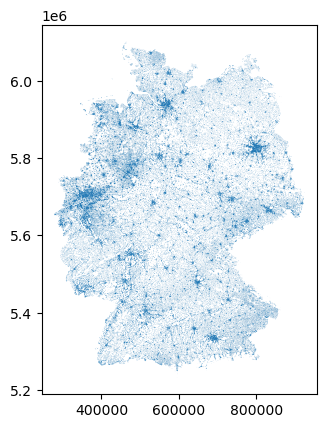

In [ ]:
# takes ~20s
landuse_buffered_diss.plot()

In [16]:
### to leave out MV, NRW and TH
bland = gpd.read_file("https://raw.githubusercontent.com/isellsoap/deutschlandGeoJSON/main/2_bundeslaender/1_sehr_hoch.geo.json")
bland_fil=bland[bland["id"].isin(["DE-BB"])]

In [17]:
landuse_clipped = landuse_buffered_diss.clip(bland_fil.to_crs(25832)).copy()
landuse_clipped

geometry     landuse       id  \
0  MULTIPOLYGON (((655444.13 5883066.623, 655436....  commercial  3220314   

   year  
0  2024

<Axes: >

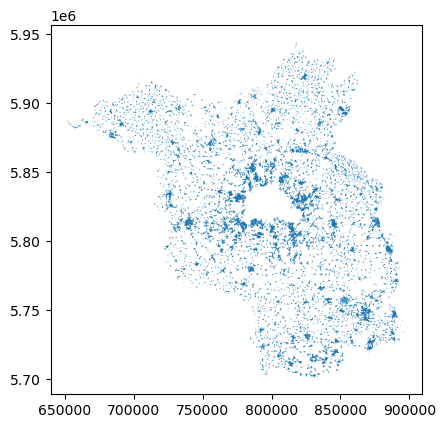

In [18]:
landuse_clipped.plot()

In [19]:
#landuse_clipped.explore()

In [20]:
### streets withon maxspeed but with accidents
osm_roads_2024_missing_ms_with_accidents = osm_roads_2024_missing_ms.merge(
    accidents_clipped_grouped, on="id", how="right"
)
osm_roads_2024_missing_ms_with_accidents

highway maxspeed maxspeed:conditional maxspeed:type maxspeed:forward  \
0        primary     None                 None          None             None   
1       tertiary     None                 None          None             None   
2      secondary     None                 None          None             None   
3      secondary     None                 None          None             None   
4      secondary     None                 None          None             None   
...          ...      ...                  ...           ...              ...   
81645   tertiary     None                 None          None             None   
81646  secondary     None                 None          None             None   
81647  secondary     None                 None          None             None   
81648   tertiary     None                 None          None             None   
81649   tertiary     None                 None          None             None   

      maxspeed:backward zone:traffic          id  \
0                  None         None     2725783   
1                  None         None     3214003   
2                  None         None     3236188   
3                  None         None     3500104   
4                  None         None     3532727   
...                 ...          ...         ...   
81645              None         None  1236103957   
81646              None         None  1236103966   
81647              None         None  1236103967   
81648              None         None  1236103968   
81649              None         None  1236104002   

                                                geometry  year  \
0      LINESTRING (701967.164 5306128.162, 701959.294...  2024   
1      MULTILINESTRING ((828609.055 5669710.787, 8285...  2024   
2      MULTILINESTRING ((472726.411 5497477.934, 4727...  2024   
3      MULTILINESTRING ((445042.264 5425536.019, 4450...  2024   
4      LINESTRING (447424.468 5435653.131, 447457.47 ...  2024   
...                                                  ...   ...   
81645  MULTILINESTRING ((680482.462 5732832.658, 6804...  2024   
81646  MULTILINESTRING ((684019.095 5737762.073, 6840...  2024   
81647  LINESTRING (684019.095 5737762.073, 684053.128...  2024   
81648  MULTILINESTRING ((684033.237 5737744.752, 6840...  2024   
81649  LINESTRING (683984.109 5733828.711, 683993.205...  2024   

       count_accidents  
0                    1  
1                    1  
2                    3  
3                    1  
4                    5  
...                ...  
81645                1  
81646               11  
81647               10  
81648               10  
81649                1  

[81650 rows x 11 columns]

In [21]:
### streets withon maxspeed but with accidents and likly in urban areas (in Brandenburg)
## takes ~4min

osm_roads_2024_intersect_landuse = osm_roads_2024_missing_ms_with_accidents.sjoin(
    landuse_clipped, how="inner", predicate="intersects"
)
osm_roads_2024_intersect_landuse

highway maxspeed maxspeed:conditional maxspeed:type  \
353         primary     None                 None          None   
354         primary     None                 None          None   
355       secondary     None                 None          None   
363         primary     None                 None          None   
426    primary_link     None                 None          None   
...             ...      ...                  ...           ...   
81505      tertiary     None                 None          None   
81506     secondary     None                 None          None   
81527       primary     None                 None          None   
81528       primary     None                 None          None   
81620     secondary     None                 None          None   

      maxspeed:forward maxspeed:backward zone:traffic     id_left  \
353               None              None         None     4440904   
354               None              None         None     4440936   
355               None              None         None     4440939   
363               None              None         None     4449161   
426               None              None         None     4541553   
...                ...               ...          ...         ...   
81505             None              None         None  1231574469   
81506             None              None         None  1231575213   
81527             None              None         None  1232198467   
81528             None              None         None  1232198468   
81620             None              None         None  1235501086   

                                                geometry year_left  \
353    MULTILINESTRING ((877139.327 5813995.667, 8771...      2024   
354    MULTILINESTRING ((875805.927 5831583.116, 8758...      2024   
355    MULTILINESTRING ((876260.422 5837563.557, 8762...      2024   
363    MULTILINESTRING ((778571.996 5821309.245, 7785...      2024   
426    MULTILINESTRING ((723269.678 5831570.032, 7232...      2024   
...                                                  ...       ...   
81505  LINESTRING (804968.442 5718111.064, 804958.025...      2024   
81506  LINESTRING (805715.148 5718832.638, 805716.655...      2024   
81527  MULTILINESTRING ((868683.564 5792330.049, 8686...      2024   
81528  MULTILINESTRING ((868283.762 5792598.592, 8682...      2024   
81620  MULTILINESTRING ((869742.965 5802220.199, 8697...      2024   

       count_accidents  index_right     landuse  id_right year_right  
353                  2            0  commercial   3220314       2024  
354                  3            0  commercial   3220314       2024  
355                  2            0  commercial   3220314       2024  
363                  2            0  commercial   3220314       2024  
426                  3            0  commercial   3220314       2024  
...                ...          ...         ...       ...        ...  
81505                1            0  commercial   3220314       2024  
81506                1            0  commercial   3220314       2024  
81527                1            0  commercial   3220314       2024  
81528                1            0  commercial   3220314       2024  
81620                5            0  commercial   3220314       2024  

[2433 rows x 15 columns]

In [22]:
## save this for later
osm_roads_2024_intersect_landuse.to_parquet("../output/roads_wo_maxspeed&accs_2024_urban.parquet")

In [30]:
len(osm_roads_2024_intersect_landuse[osm_roads_2024_intersect_landuse["count_accidents"]>10])#.sort_values("count_accidents", ascending=False)

55

In [31]:
len(osm_roads_2024_intersect_landuse[osm_roads_2024_intersect_landuse["count_accidents"]>5])#.sort_values("count_accidents", ascending=False)

222

In [32]:
#list(osm_roads_2024_intersect_landuse[osm_roads_2024_intersect_landuse["count_accidents"]>5]["id_left"])

In [33]:
", ".join(map(str, osm_roads_2024_intersect_landuse[osm_roads_2024_intersect_landuse["count_accidents"]>5]["id_left"].tolist()))

'4723832, 4723839, 4747627, 4748085, 4795199, 4795333, 4795344, 4867287, 5077702, 8030487, 8153918, 8771061, 8771096, 8771115, 8771449, 8771977, 9703783, 15510225, 17055288, 18083713, 21604886, 22696335, 22745599, 22904724, 22906967, 22944798, 23016662, 23433062, 23458751, 23501260, 23610427, 23610579, 23692730, 23901417, 24557971, 26186345, 26359917, 26366673, 27015219, 27095871, 27095872, 27184171, 27267524, 27559768, 27568420, 27713198, 27808137, 27996623, 28137856, 29314809, 29326475, 29328005, 29983376, 30051383, 31276463, 31349385, 32491753, 34832559, 35130347, 35364462, 35364483, 35364497, 35873927, 38027968, 39087760, 39624458, 39813322, 39819037, 40347570, 40496962, 41416554, 42767070, 43386271, 44572896, 45830949, 46579066, 47253689, 59967943, 60358733, 62213363, 64503415, 69918888, 75377412, 81024256, 81206909, 82985124, 92930427, 97102921, 101184512, 118977398, 123082971, 123160106, 124055057, 125301266, 126710199, 127995332, 128284101, 128840032, 133747274, 133747278, 1375

In [ ]:
# Diese Query zeigt Straßenabschnitte in Brandenburg ohne Angabe von zul. Geschwindigkeit vermutlich innerorts aber in den letzten Jahren gab es dort mehr als 5 Unfälle.
# # https://overpass-turbo.eu/s/21dR

In [ ]:
#### now add the mapillary info

In [1]:
import geopandas as gpd
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np
from tqdm import tqdm

In [2]:
# ndissolved works well, however rather want to work with dissolved and cut TODOO

#mapillary_coverage = gpd.read_parquet(r"../../mapillary/mapillary_coverage_23_bb_buffered10m_dissolved.parquet")
mapillary_coverage = gpd.read_parquet(r"../../mapillary/mapillary_coverage_23_bb_buffered10m_ndissolved.parquet")

In [4]:
mapillary_coverage=mapillary_coverage[mapillary_coverage["is_pano"]==True].copy()

In [5]:
mapillary_coverage = mapillary_coverage.to_crs(25832)

In [6]:
mapillary_clean = mapillary_coverage.explode(index_parts=False, ignore_index=True)

In [7]:
#mapillary_clean.sindex

In [8]:
# osm_roads_2024_intersect_landuse.to_parquet("../output/roads_wo_maxspeed&accs_2024_urban.parquet")
osm_roads_2024_intersect_landuse = gpd.read_parquet("../output/roads_wo_maxspeed&accs_2024_urban.parquet")

In [9]:
#osm_roads_2024_intersect_landuse.crs

In [10]:
#sample=osm_roads_2024_intersect_landuse[:1].copy()

In [11]:

# sample=osm_roads_2024_intersect_landuse[:50].copy()

# clipped_lines = []

# for _, row in sample.iterrows():
#     bbox = box(*row.geometry.bounds)
#     filtered_polys = mapillary_clean[mapillary_clean.intersects(bbox)]
    
#     if not filtered_polys.empty:
#         clipped = gpd.clip(gpd.GeoDataFrame([row], crs=sample.crs), filtered_polys)
#         clipped_lines.append(clipped)

# # Combine all results
# clipped_gdf = gpd.GeoDataFrame(pd.concat(clipped_lines, ignore_index=True), crs=sample.crs)

# clipped_gdf

In [12]:
osm_roads_2024_intersect_landuse['length_km_before_clip'] = osm_roads_2024_intersect_landuse.geometry.length
osm_roads_2024_intersect_landuse

highway maxspeed maxspeed:conditional maxspeed:type  \
353         primary     None                 None          None   
354         primary     None                 None          None   
355       secondary     None                 None          None   
363         primary     None                 None          None   
426    primary_link     None                 None          None   
...             ...      ...                  ...           ...   
81505      tertiary     None                 None          None   
81506     secondary     None                 None          None   
81527       primary     None                 None          None   
81528       primary     None                 None          None   
81620     secondary     None                 None          None   

      maxspeed:forward maxspeed:backward zone:traffic     id_left  \
353               None              None         None     4440904   
354               None              None         None     4440936   
355               None              None         None     4440939   
363               None              None         None     4449161   
426               None              None         None     4541553   
...                ...               ...          ...         ...   
81505             None              None         None  1231574469   
81506             None              None         None  1231575213   
81527             None              None         None  1232198467   
81528             None              None         None  1232198468   
81620             None              None         None  1235501086   

                                                geometry year_left  \
353    MULTILINESTRING ((877139.327 5813995.667, 8771...      2024   
354    MULTILINESTRING ((875805.927 5831583.116, 8758...      2024   
355    MULTILINESTRING ((876260.422 5837563.557, 8762...      2024   
363    MULTILINESTRING ((778571.996 5821309.245, 7785...      2024   
426    MULTILINESTRING ((723269.678 5831570.032, 7232...      2024   
...                                                  ...       ...   
81505  LINESTRING (804968.442 5718111.064, 804958.025...      2024   
81506  LINESTRING (805715.148 5718832.638, 805716.655...      2024   
81527  MULTILINESTRING ((868683.564 5792330.049, 8686...      2024   
81528  MULTILINESTRING ((868283.762 5792598.592, 8682...      2024   
81620  MULTILINESTRING ((869742.965 5802220.199, 8697...      2024   

       count_accidents  index_right     landuse  id_right year_right  \
353                  2            0  commercial   3220314       2024   
354                  3            0  commercial   3220314       2024   
355                  2            0  commercial   3220314       2024   
363                  2            0  commercial   3220314       2024   
426                  3            0  commercial   3220314       2024   
...                ...          ...         ...       ...        ...   
81505                1            0  commercial   3220314       2024   
81506                1            0  commercial   3220314       2024   
81527                1            0  commercial   3220314       2024   
81528                1            0  commercial   3220314       2024   
81620                5            0  commercial   3220314       2024   

       length_km_before_clip  
353               429.813023  
354               984.864398  
355               618.789356  
363                35.483177  
426               394.845855  
...                      ...  
81505              15.978136  
81506              20.146320  
81527             484.746780  
81528              30.828617  
81620             225.556073  

[2433 rows x 16 columns]

In [13]:
from shapely.geometry import box

def spatial_filter(gdf, geom):
    idx = gdf.sindex.query(geom, predicate="intersects")
    return gdf.iloc[idx]


#sample=osm_roads_2024_intersect_landuse[:1500].copy()
sample=osm_roads_2024_intersect_landuse.copy()


clipped_lines = []

clipped_gdf = gpd.GeoDataFrame()

for _, row in sample.iterrows():
    bbox = box(*row.geometry.bounds)
    #filtered_polys = mapillary_clean[mapillary_clean.intersects(bbox)]
    filtered_polys = spatial_filter(mapillary_clean, bbox) # 3times faster than intersects
    
    if not filtered_polys.empty:
        clipped = gpd.clip(gpd.GeoDataFrame([row], crs=sample.crs), filtered_polys)
        clipped_lines.append(clipped)

# Combine all results
clipped_gdf = gpd.GeoDataFrame(pd.concat(clipped_lines, ignore_index=True), crs=sample.crs)


In [14]:
clipped_gdf['length_km_after_clip'] = clipped_gdf.geometry.length

#clipped_gdf=clipped_gdf.merge(osm_roads_2024_intersect_landuse[["id_left","length_km_before_clip"]], on="id_left", how="left")

clipped_gdf["mp_coverage_ratio"] = clipped_gdf["length_km_after_clip"] / clipped_gdf["length_km_before_clip"]

#clipped_gdf.sort_values("mp_coverage_ratio", ascending=False)[:10]


array([[<Axes: title={'center': 'mp_coverage_ratio'}>]], dtype=object)

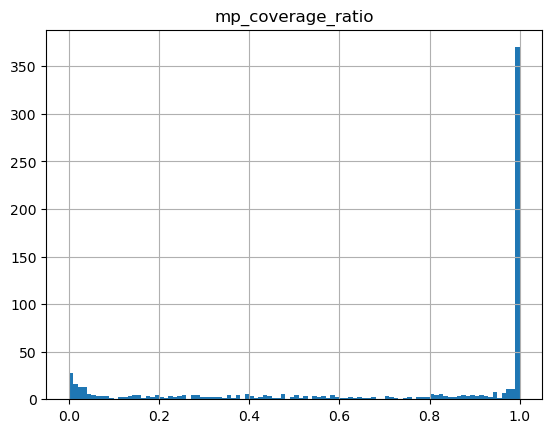

In [15]:
clipped_gdf.hist(column="mp_coverage_ratio", bins=100)

In [16]:
### 

In [17]:
## mapillary coverage ratio > 0.9 and more than 5 accidents
clipped_gdf[(clipped_gdf["mp_coverage_ratio"]>0.9) & (clipped_gdf["count_accidents"]>5)].sort_values("count_accidents", ascending=False)#[:10]

highway maxspeed maxspeed:conditional maxspeed:type  \
499       primary     None                 None          None   
202      tertiary     None                 None          None   
51       tertiary     None                 None          None   
106       primary     None                 None          None   
465      tertiary     None                 None          None   
118     secondary     None                 None          None   
78       tertiary     None                 None          None   
140      tertiary     None                 None          None   
522       primary     None                 None          None   
375      tertiary     None                 None          None   
368      tertiary     None                 None          None   
629     secondary     None                 None          None   
590       primary     None                 None          None   
320       primary     None                 None          None   
112       primary     None                 None          None   
110      tertiary     None                 None          None   
86       tertiary     None                 None          None   
297     secondary     None                 None          None   
502     secondary     None                 None          None   
535       primary     None                 None          None   
161      tertiary     None                 None          None   
674      tertiary     None                 None          None   
304       primary     None                 None          None   
68        primary     None                 None          None   
632      tertiary     None                 None          None   
596      tertiary     None                 None          None   
25       tertiary     None                 None          None   
692     secondary     None                 None          None   
220     secondary     None                 None          None   
571      tertiary     None                 None          None   
584       primary     None                 None          None   
473  primary_link     None                 None          None   
481      tertiary     None                 None          None   
22        primary     None                 None          None   
45        primary     None                 None          None   
73       tertiary     None                 None          None   
366       primary     None                 None          None   
254     secondary     None                 None          None   
273      tertiary     None                 None          None   
453     secondary     None                 None          None   
559      tertiary     None                 None          None   
578     secondary     None                 None          None   
690     secondary     None                 None          None   

    maxspeed:forward maxspeed:backward zone:traffic     id_left  \
499             None              None         None   384301112   
202             None              None         None    59967943   
51              None              None         None    24557971   
106             None              None         None    29328005   
465             None              None         None   315144264   
118             None              None         None    31276463   
78              None              None         None    27559768   
140             None              None         None    35873927   
522             None              None         None   438295593   
375             None              None         None   203255928   
368             None              None         None   198818952   
629             None              None         None   966803908   
590             None              None         None   769167196   
320             None              None         None   148460813   
112             None              None         None    30051383   
110             None              None         None    29983376   
86        

In [18]:
", ".join(map(str, clipped_gdf[(clipped_gdf["mp_coverage_ratio"]>0.9) & (clipped_gdf["count_accidents"]>5)]["id_left"].tolist()))

'8771096, 8771449, 23692730, 24557971, 26366673, 27184171, 27559768, 27808137, 29328005, 29983376, 30051383, 31276463, 35873927, 43386271, 59967943, 75377412, 101184512, 118977398, 128284101, 133747274, 148460813, 195646079, 198818952, 203255928, 301255839, 315144264, 317429966, 344361833, 384301112, 396428806, 438295593, 480741228, 589442136, 631801746, 719920525, 764551238, 769167196, 826562518, 966803908, 997214442, 1172690403, 1207837737, 1218403543'

<Axes: >

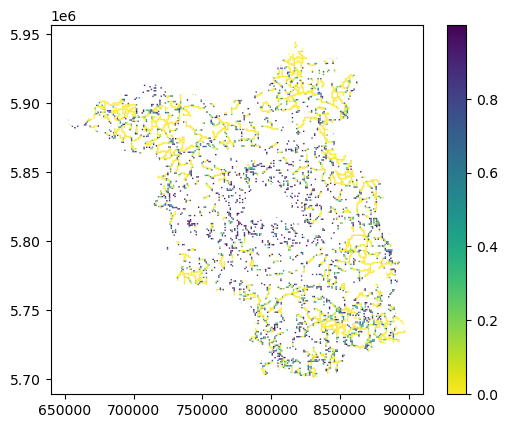

In [34]:
gdf_polygons_merge[gdf_polygons_merge["ratio_complete"]<1].plot(column="ratio_complete", legend=True, cmap="viridis_r")

In [37]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import contextily as ctx

# Reproject to Web Mercator for basemap compatibility
gdf_plot = gdf_polygons_res_ew.clip(bland_bb.to_crs(25832)).to_crs(epsg=3857)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 12))

# Plot the GeoDataFrame
gdf_plot.plot(
    column="ratio_complete",
    cmap="viridis_r",
    ax=ax,
    legend=False  # we’ll add the colorbar manually later
)

# Add CartoDB Light basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=gdf_plot.crs)

# Remove axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")

# Add a title
ax.set_title("Completion Ratio Across Brandenburg, EW >100", fontsize=22, fontweight='bold')

# Add date in the top right corner
ax.text(
    0.95, 0.98, "1.1.2024",
    transform=ax.transAxes,
    fontsize=16,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3')
)

# Create a ScalarMappable for the colorbar
norm = mpl.colors.Normalize(vmin=gdf_plot["ratio_complete"].min(),
                            vmax=gdf_plot["ratio_complete"].max())
sm = mpl.cm.ScalarMappable(cmap="viridis_r", norm=norm)
sm._A = []  # Required for colorbar

# Add the vertical colorbar inside the plot (bottom right)
cbar_ax = fig.add_axes([0.17, 0.12, 0.02, 0.3])
cbar = plt.colorbar(sm, cax=cbar_ax, orientation="vertical")
cbar.ax.tick_params(labelsize=14)

# Show the plot
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'contextily'

<Axes: >

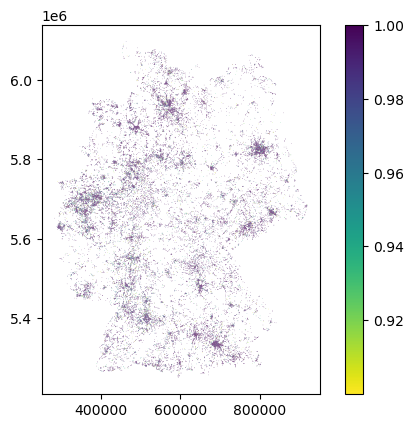

In [213]:
gdf_polygons_res_ew[gdf_polygons_res_ew.ratio_complete>0.90].plot(column="ratio_complete", legend=True, cmap="viridis_r")

In [219]:
gdf_polygons_res_ew[gdf_polygons_res_ew.ratio_complete>0.90].Einwohner.sum()

np.float64(41640756.0)